In [525]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [526]:
# get the train and test csv
X = pd.read_csv('../input/home-data-for-ml-course/train.csv', index_col='Id')
X_test = pd.read_csv('../input/home-data-for-ml-course/test.csv', index_col='Id')

y = X.pop('SalePrice')

X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [527]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [528]:
# get all the sales prices
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [529]:
# find low cardinality categorical columns
low_card_cols = [col for col in X.columns if X[col].nunique() < 15 and X[col].dtype == 'object']
low_card_cols = set(low_card_cols)
low_card_cols

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [530]:
# get the numerical columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [531]:
# look at the numerical cols
X[numerical_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [532]:
# find null columns
nulls = X.isna().sum()[ X.isna().sum() > 0]
many_nulls_list = nulls[nulls > 100]
print(many_nulls_list)

"""
LotFrontage: Linear feet of street connected to property
most likely data not avaliable

Alley: Type of alley access to property
Makes sense to input as a constant value of none

FireplaceQu: Fireplace quality
Many NA fireplaces -> null

PoolQC: Pool quality
Many NA pools -> null

Fence: Fence Quality
Many NA fences- > null

MiscFeature: Miscellaneous feature not covered in other categories
Many NA (none) other features -> null

"""

LotFrontage     259
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


'\nLotFrontage: Linear feet of street connected to property\nmost likely data not avaliable\n\nAlley: Type of alley access to property\nMakes sense to input as a constant value of none\n\nFireplaceQu: Fireplace quality\nMany NA fireplaces -> null\n\nPoolQC: Pool quality\nMany NA pools -> null\n\nFence: Fence Quality\nMany NA fences- > null\n\nMiscFeature: Miscellaneous feature not covered in other categories\nMany NA (none) other features -> null\n\n'

In [533]:
# get the set of values in columns with many unique values (the imputers and data transformers on these columns may impact results)
many_null_cols = [col for col in many_nulls_list.index]
many_null_col_vals = [set(X[col].dropna()) for col in many_null_cols]
many_nulls = dict(zip(many_null_cols, many_null_col_vals))
many_nulls

{'LotFrontage': {21.0,
  24.0,
  30.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0,
  52.0,
  53.0,
  54.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  60.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  66.0,
  67.0,
  68.0,
  69.0,
  70.0,
  71.0,
  72.0,
  73.0,
  74.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0,
  83.0,
  84.0,
  85.0,
  86.0,
  87.0,
  88.0,
  89.0,
  90.0,
  91.0,
  92.0,
  93.0,
  94.0,
  95.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  101.0,
  102.0,
  103.0,
  104.0,
  105.0,
  106.0,
  107.0,
  108.0,
  109.0,
  110.0,
  111.0,
  112.0,
  114.0,
  115.0,
  116.0,
  118.0,
  120.0,
  121.0,
  122.0,
  124.0,
  128.0,
  129.0,
  130.0,
  134.0,
  137.0,
  138.0,
  140.0,
  141.0,
  144.0,
  149.0,
  150.0,
  152.0,
  153.0,
  160.0,
  168.0,
  174.0,
  182.0,
  313.0},
 'Alley': {'Grvl', 'Pave'},
 'FireplaceQu': {'Ex', 'Fa', 'Gd', 'P

In [534]:
replace_null_cols = many_null_cols[1:]
replace_null_cols 

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [535]:
# check categorical transformer for many null cols and drop
low_card_cols = list(low_card_cols - set(replace_null_cols))
low_card_cols

['GarageFinish',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'Utilities',
 'HouseStyle',
 'RoofStyle',
 'LandContour',
 'KitchenQual',
 'Electrical',
 'SaleCondition',
 'LandSlope',
 'LotShape',
 'BsmtFinType1',
 'GarageQual',
 'Condition1',
 'MSZoning',
 'MasVnrType',
 'BsmtQual',
 'RoofMatl',
 'BsmtFinType2',
 'GarageCond',
 'PavedDrive',
 'Heating',
 'ExterCond',
 'ExterQual',
 'BldgType',
 'GarageType',
 'Functional',
 'Condition2',
 'Foundation',
 'CentralAir',
 'Street',
 'SaleType',
 'LotConfig']

In [536]:
# explore the columns that start with lot to see if lot frontage can be removed
lots = [col for col in X.columns if col.startswith('Lot')]
lot_df = X[lots].sort_values(by='LotFrontage', ascending=False)
lot_df.head(20)

,LotFrontage,LotArea,LotShape,LotConfig
Id,,,,
1299,313.0,63887,IR3,Corner
935,313.0,27650,IR2,Inside
1128,182.0,14572,IR3,Corner
232,174.0,15138,IR1,Inside
198,174.0,25419,Reg,Corner
1108,168.0,23257,IR3,CulDSac
1183,160.0,15623,IR1,Corner
1338,153.0,4118,IR1,Corner
1212,152.0,12134,IR1,Inside


Text(0.5, 1.0, 'Lot frontage vs area')

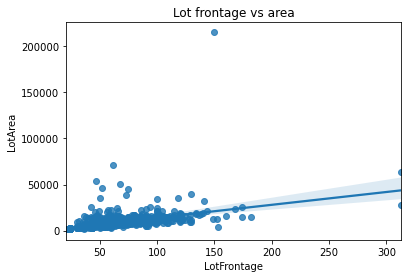

In [537]:
# plot lot frontage vs lot area
import seaborn as sns
ax = sns.regplot(x=lot_df['LotFrontage'], y=lot_df['LotArea'])
ax.set_title('Lot frontage vs area')

In [538]:
# calculate pearson correlation
pearsoncorr = lot_df.corr(method='pearson')
pearsoncorr

# consider dropping lot frontage since there is moderate correlation

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


In [539]:
# change the feature data to only include the columns for low cardinality categorical columns and numbers
X_clean = X[numerical_cols + low_card_cols + replace_null_cols].copy()
X_clean.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Foundation,CentralAir,Street,SaleType,LotConfig,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,PConc,Y,Pave,WD,Inside,NaN,NaN,NaN,NaN,NaN
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,CBlock,Y,Pave,WD,FR2,NaN,TA,NaN,NaN,NaN
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,PConc,Y,Pave,WD,Inside,NaN,TA,NaN,NaN,NaN
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,BrkTil,Y,Pave,WD,Corner,NaN,Gd,NaN,NaN,NaN
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,PConc,Y,Pave,WD,FR2,NaN,TA,NaN,NaN,NaN


In [540]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

# deal with numerical cols
numerical_transformer = SimpleImputer(strategy='median')

# deal with columns that have many null values
many_null_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# deal with categorical columns. Test two strategies for the imputer
categorical_transformer_1 = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# strategy two for categorical
categorical_transformer_2 = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_1 = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('many_null', many_null_transformer, replace_null_cols),
        ('categorical', categorical_transformer_1, low_card_cols)
    ])

preprocessor_2 = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('many_null', many_null_transformer, replace_null_cols),
        ('categorical', categorical_transformer_2, low_card_cols)
    ])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass missing_values=median as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [541]:
from sklearn.model_selection import cross_val_score
from typing import Union
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

def test_model(model: Union[RandomForestRegressor, xgb.XGBRegressor], preprocesser: ColumnTransformer) -> float:
    # create the pipeline for the model
    model_pipeline = Pipeline(steps = [
        ('preprocess', preprocesser),
        ('model', model)
    ])
    
    # use cross validation on 80:20 splits to check model accuracy
    scores = -1 * cross_val_score(model_pipeline, X_clean, y, cv=5, scoring='neg_mean_absolute_error')
    
    return scores.mean()

In [542]:
# create a few random forest models
model_1 = RandomForestRegressor(n_estimators=100, random_state=0)
model_2 = RandomForestRegressor(n_estimators=200, random_state=0)
model_3 = RandomForestRegressor(n_estimators=300, random_state=0)
model_4 = RandomForestRegressor(n_estimators=400, random_state=0)
model_5 = RandomForestRegressor(n_estimators=500, random_state=0)

rf_list = [model_1, model_2, model_3, model_4, model_5]
for model in rf_list:
    print(test_model(model, preprocessor_2))
    
"""
Results
17582.88258904109
17545.992270547944
17532.8472283105
17562.180580479453
17559.728131506847

Run 2
17696.57582191781
17629.291688356163
17618.58353652968
17606.96818150685
17606.63126027397
"""

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/opt/conda/lib/python3.7/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/opt/conda/lib/python3.7/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/

nan
nan
nan
nan
nan


'\nResults\n17582.88258904109\n17545.992270547944\n17532.8472283105\n17562.180580479453\n17559.728131506847\n\nRun 2\n17696.57582191781\n17629.291688356163\n17618.58353652968\n17606.96818150685\n17606.63126027397\n'

In [543]:
model_6 = RandomForestRegressor(n_estimators=325, random_state=0)
model_7 = RandomForestRegressor(n_estimators=350, random_state=0)
model_8 = RandomForestRegressor(n_estimators=700, random_state=0)

rf_list_2 = [model_6, model_7, model_8]
# for model in rf_list_2:
#     print(test_model(model, preprocessor_1))
"""
Results
17552.264642781876
17545.47420156556
17573.30147162427
"""

'\nResults\n17552.264642781876\n17545.47420156556\n17573.30147162427\n'